In [12]:
import pandas as pd
import numpy as np
 
# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer
 
# instantiating
cancer = load_breast_cancer(as_frame=True)
# creating dataframe
df = cancer.frame
 
# checking shape
print('Original Dataframe shape :',df.shape)
 
# Input features
X = df[cancer['feature_names']]
print('Inputs Dataframe shape   :', X.shape)

Original Dataframe shape : (569, 31)
Inputs Dataframe shape   : (569, 30)


In [13]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std


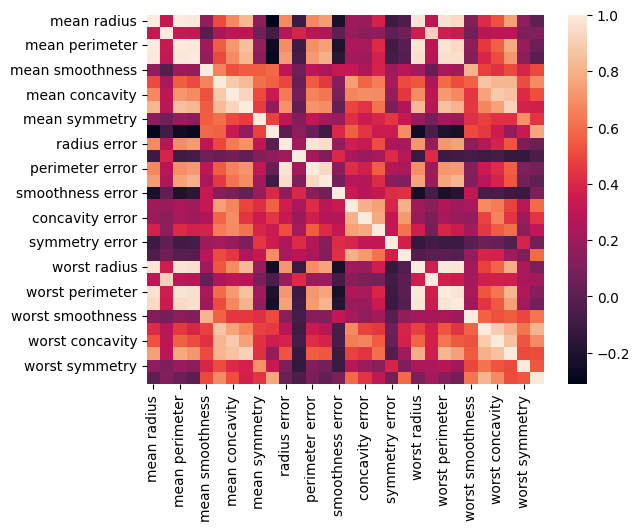

In [14]:
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()


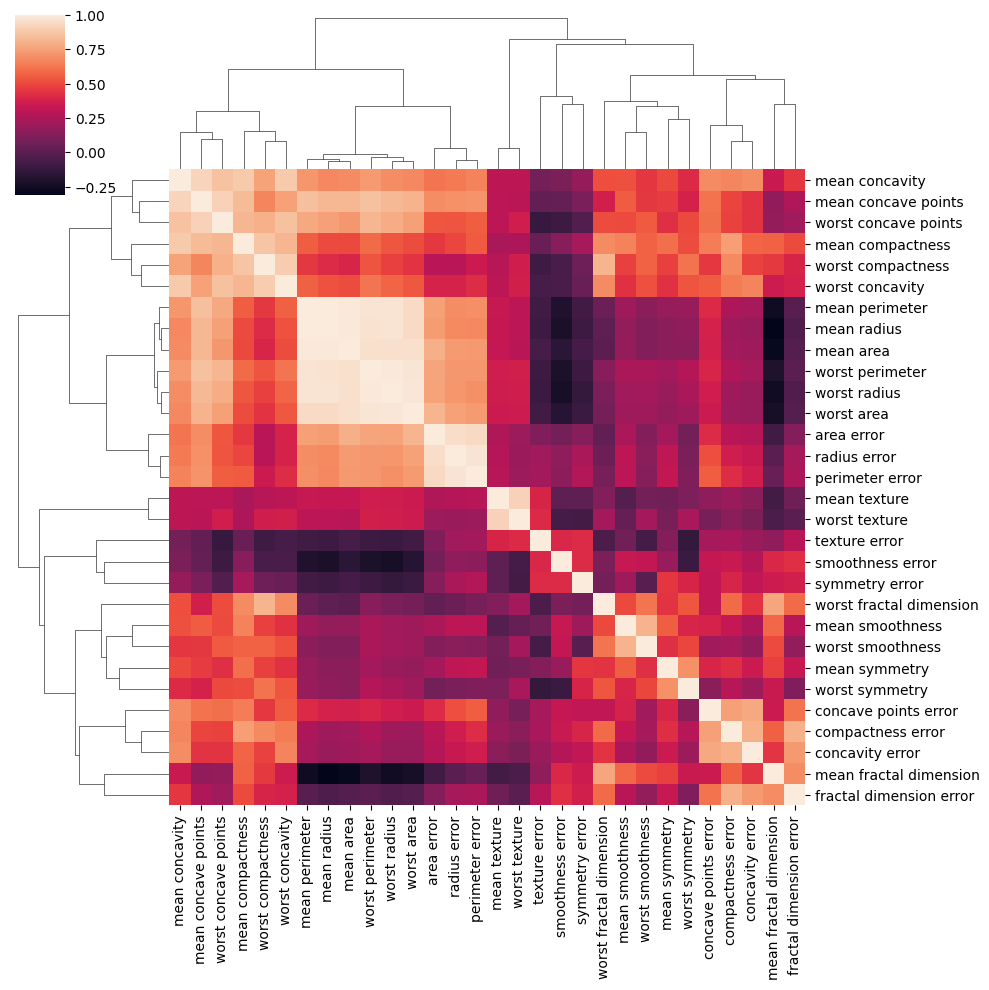

In [15]:
sns.clustermap(c)
plt.show()

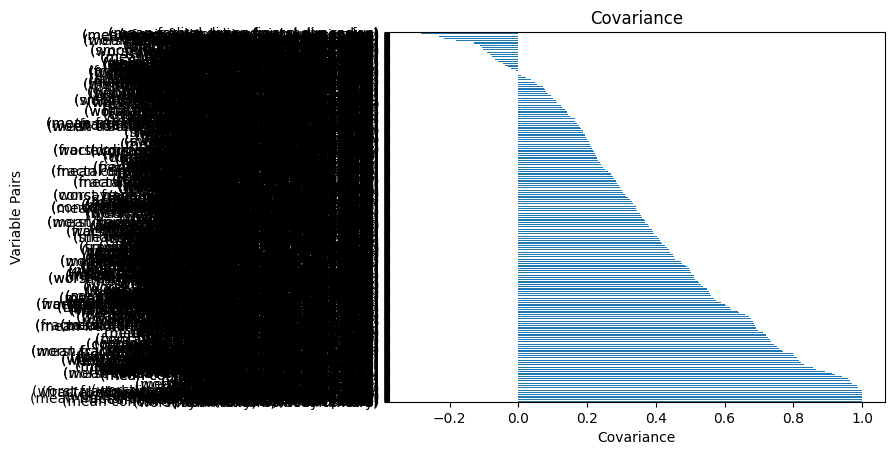

In [32]:
# c.unstack().plot(kind='bar')
# plt.title('Covariance')
# plt.xlabel('Variable Pairs')
# plt.ylabel('Covariance')
# plt.show()

sorted_c = c.unstack().sort_values(ascending=False)
# top_n = 10  # Adjust the number of top pairs to display
# sorted_c[:top_n].plot(kind='bar')
# plt.title('Top {} Covariance Pairs'.format(top_n))
# plt.xlabel('Variable Pairs')
# plt.ylabel('Covariance')
# plt.show()

sorted_c.plot(kind='barh')
plt.title('Covariance')
plt.ylabel('Variable Pairs')
plt.xlabel('Covariance')
plt.show()

In [17]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)


Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


In [18]:
# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]


In [19]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var


array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [20]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components


2

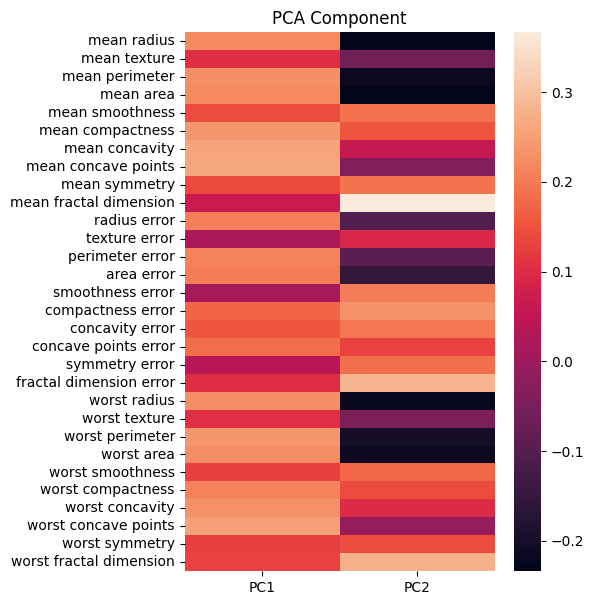

In [21]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
							index = cancer['feature_names'],
							columns = ['PC1','PC2']
							)

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()


In [22]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the Pricipal Component values
print(Z_pca)


          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]
